In [191]:
from manim import *

import random

In [382]:
%%manim -qh -v CRITICAL ab
#--disable_caching tt_book
#note that without --disable_caching the voice_over service will have a bug!
#Description:
#Intro scene that starts with dice rolls, and get to the question, But why is the CLT true?

COLORS = [GREY,BLUE,RED]

my_delay = 1


def set_new_location(A,B):
    A.set_x(B.get_x())
    A.set_y(B.get_y())
    
def set_convex_location(who,A,B,C,wA=0.333,wB=0.333,wC=0.333):
    who.set_x(wA*A.get_x()+wB*B.get_x()+wC*C.get_x())
    who.set_y(wA*A.get_y()+wB*B.get_y()+wC*C.get_y())
    

class ab(Scene):
    def construct(self):
        #
        bob_color = BLUE
        body2 = MathTex(r"\beta",color=bob_color).scale(6).shift(0.3*DOWN)
        
        # Create the left eye
        left_eye2 = Circle(radius=0.3, color=WHITE, fill_opacity=1)
        left_eye2.shift(LEFT * 0.5 + UP * 0.5)  # Position to the left of the body

        # Create the right eye
        right_eye2 = Circle(radius=0.3, color=WHITE, fill_opacity=1)
        right_eye2.shift(RIGHT * 0.5 + UP * 0.5)  # Position to the right of the body

        # Create the left pupil
        left_pupil2 = Circle(radius=0.1, color=BLACK, fill_opacity=1)
        left_pupil2.shift(LEFT * 0.6 + UP * 0.5)  # Same center as the left eye

        # Create the right pupil
        right_pupil2 = Circle(radius=0.1, color=BLACK, fill_opacity=1)
        right_pupil2.shift(RIGHT * 0.4 + UP * 0.5)  # Same center as the right eye
        
        label2 = MathTex(r"\text{Bob}",color=bob_color,font_size=100).next_to(body2,DOWN)
        
        Bob = VGroup(body2,left_eye2,right_eye2,left_pupil2,right_pupil2,label2)
        
        
        #"#cc0000"
        alice_color = RED
        body = MathTex(r"\alpha",color=alice_color).scale(6).shift(0.3*DOWN)
        
        # Create the left eye
        left_eye = Circle(radius=0.3, color=WHITE, fill_opacity=1)
        left_eye.shift(LEFT * 0.5 + UP * 0.5)  # Position to the left of the body

        # Create the right eye
        right_eye = Circle(radius=0.3, color=WHITE, fill_opacity=1)
        right_eye.shift(RIGHT * 0.5 + UP * 0.5)  # Position to the right of the body

        # Create the left pupil
        left_pupil = Circle(radius=0.1, color=BLACK, fill_opacity=1)
        left_pupil.shift(LEFT * 0.4 + UP * 0.5)  # Same center as the left eye

        # Create the right pupil
        right_pupil = Circle(radius=0.1, color=BLACK, fill_opacity=1)
        right_pupil.shift(RIGHT * 0.6 + UP * 0.5)  # Same center as the right eye
        
        label = MathTex(r"\text{Alice}",color=alice_color).scale(2).next_to(body,DOWN)
        label.set_y(label2.get_y()) #align ALices label to Bobs
        
        Alice = VGroup(body,left_eye,right_eye,left_pupil,right_pupil,label)
        
        
        
        
        Alice.to_edge(LEFT)
        Bob.to_edge(RIGHT)
        
        Message = MathTex("1","011").scale(3)
        Message.next_to(Alice,RIGHT)
        
        
        self.add(Alice,Bob)
        self.wait(2)
        
        self.play(FadeIn(Message,shift=RIGHT))
        self.wait()
        
        my_time = 4
        def velocity_updater(mob, dt):
            velocity = 0.05*RIGHT
            mob.shift(velocity)  # Shift the circle's position by the velocity vector

        # Add the velocity updater to the circle
        
        Message.add_updater(velocity_updater)
        self.wait(4)
        return 0
        
        #
        
        f = MathTex("0").scale(3)
        set_new_location(f,Message[0])
        f.add_updater(velocity_updater)
        self.play(Transform(Message[0],f),Flash(Message[0],line_length=1.0))
        self.wait(3)
        
        return 0
        
        # Stop the updater after 5 seconds (optional)
        #circle.remove_updater(velocity_updater)
        
        #self.play(Move)
        
        
        


In [306]:
%%manim -qh -v CRITICAL ham
#--disable_caching tt_book
#note that without --disable_caching the voice_over service will have a bug!
#Description:
#Intro scene that starts with dice rolls, and get to the question, But why is the CLT true?

COLORS = [GREY,BLUE,RED]

my_delay = 1


def set_new_location(A,B):
    A.set_x(B.get_x())
    A.set_y(B.get_y())
    
def set_convex_location(who,A,B,C,wA=0.333,wB=0.333,wC=0.333):
    who.set_x(wA*A.get_x()+wB*B.get_x()+wC*C.get_x())
    who.set_y(wA*A.get_y()+wB*B.get_y()+wC*C.get_y())
    

class ham(Scene):
    def construct(self):
        #"#cc0000"
        #myRed, myOrange, myYellow, myGreen, myBlue, myPurple = "#ff4242", "#e69138", "#f1c232", "#6aa84f", "#3d85c6", "#8e7cc3"
        #myOrange = ORANGE
        
        #myRed, myOrange, myYellow, myGreen, myBlue, myPurple = "#ff595E", "#ff924c", "#ffca3a", "#8ac926", "#1a8ad0", "#8863bb"
        myRed, myOrange, myYellow, myGreen, myBlue, myPurple = "#ff006d", "#ff7d00", "#ffdd00", "#70b600", "#01befe", "#b555ff"
        
        data_colors = [myRed, myBlue, myYellow, WHITE]
        parity_colors = [myPurple, myOrange, myGreen]
        bit_font_size = 100
        
        data_val = ["1","0","1","1"]
        parity_val = ["0","1","0"]
        
        def flip_bit(string_bit):
            if string_bit == "1":
                return "0"
            elif string_bit == "0":
                return "1"
            
        DELAY = 5
        
        #myRed = RED_D
        #myRed, myOrange, myYellow, myGreen, myBlue, myPurple = RED_E, ORANGE, YELLOW_E, GREEN_E, BLUE_E, PURPLE_E
        # Define the radius of the circles
        center_distance = 2.9
        radius = 2.6
        
        circle_color =GREY
        # Create three circles
        circle_stroke = 5
        circleLeft = Circle(radius=radius, color=circle_color,stroke_width=circle_stroke).shift(0.5*LEFT * center_distance)
        circleRight = Circle(radius=radius, color=circle_color,stroke_width=circle_stroke).shift(0.5*RIGHT * center_distance)
        
        # The third circle will be positioned at the top of the equilateral triangle
        triangle_height = center_distance * np.sqrt(3) / 2
        circleUp = Circle(radius=radius, color=circle_color,stroke_width=circle_stroke).shift(UP * triangle_height)
        
        circle_group = VGroup(circleUp,circleLeft,circleRight)
        
        #my_square = Square(side_length=7.99,color=YELLOW)
        #my_square.to_edge(RIGHT)
        #self.add(my_square)
        
        #set_new_location(circle_group,my_square)
        #circle_group.shift(4*RIGHT)
        circle_group.set_y(0)
        #self.add(circle_group)
        
        data_bits = [MathTex(data_val[i],font_size=bit_font_size,color=data_colors[i]) for i in range(4)]
        
        
        set_convex_location(data_bits[3],circleLeft,circleRight,circleUp)
        #self.add(bit_4)
        
        c = 0.5
        
        set_convex_location(data_bits[2],circleLeft,circleRight,circleUp,wA=c,wB=c,wC=-c)
        data_bits[2].shift(0.1*DOWN)
        
        set_convex_location(data_bits[0],circleLeft,circleRight,circleUp,wA=c,wB=-c,wC=c)
        #self.add(bit_2)
        
        set_convex_location(data_bits[1],circleLeft,circleRight,circleUp,wA=-c,wB=c,wC=c)
        #self.add(bit_1)
        
        pc = 1
        
        parity_bits = [MathTex(parity_val[i],font_size=bit_font_size,color=parity_colors[i]) for i in range(3)]
        set_convex_location(parity_bits[0],data_bits[0],data_bits[1],data_bits[2],wA=pc,wB=pc,wC=-pc)
        parity_bits[0].shift(DOWN*0.1)
        set_convex_location(parity_bits[1],data_bits[0],data_bits[1],data_bits[2],wA=pc,wB=-pc,wC=pc)
        set_convex_location(parity_bits[2],data_bits[0],data_bits[1],data_bits[2],wA=-pc,wB=pc,wC=pc)
        
        #pbit_2 = MathTex("1",font_size=bit_font_size,color=myOrange)
        #set_convex_location(pbit_2,bit_1,bit_2,bit_3,wA=pc,wB=-pc,wC=pc)
        
        #pbit_3 = MathTex("1",font_size=bit_font_size,color=myPurple)
        #set_convex_location(pbit_3,bit_1,bit_2,bit_3,wA=-pc,wB=pc,wC=pc)
        
        #self.add(pbit_1,pbit_2,pbit_3)
        
        big_group = VGroup(circle_group,*data_bits,*parity_bits)
        big_group.to_edge(RIGHT)
        #self.add(big_group)
        
        data_string = VGroup(*[ MathTex(data_val[i],font_size=bit_font_size,color=data_colors[i]) for i in range(4) ]).arrange(RIGHT,buff=0.4).to_corner(UL,buff=1.0)
        parity_string = VGroup(*[ MathTex(parity_val[i],font_size=bit_font_size,color=parity_colors[i]) for i in range(3) ]).arrange(RIGHT,buff=0.4).next_to(data_string,buff=0.8)
        
        #self.add(data_string,error_string)
        
        for i in data_string:
            data_string.color = WHITE
        
        #draw in the data string
        self.play(LaggedStart(*[Write(data_string[i]) for i in range(4)], lag_ratio=0.5))
        self.wait(DELAY)
        
        #animate coloring in the data string
        self.play(LaggedStart(*[data_string[i].animate.set_color(data_colors[i]) for i in range(4)], lag_ratio=0.5))
        self.wait(DELAY)
        
        #draw in the venn diagram circles
        self.play(LaggedStart(*[Write(circle_group[i]) for i in range(3)], lag_ratio=0.5))
        self.wait(DELAY)
        
        #copy over the data bits into the venn diagram
        self.play(LaggedStart(*[ReplacementTransform(data_string[i].copy(), data_bits[i]) for i in range(4)], lag_ratio=0.75))
        self.wait(DELAY)
        
        #draw in the parity bit one by one
        self.play(Transform(VGroup(data_bits[3],data_bits[0],data_bits[1]).copy(),parity_bits[0]))
        self.wait(DELAY)
        #
        self.play(Transform(VGroup(data_bits[3],data_bits[0],data_bits[2]).copy(),parity_bits[1]))
        self.wait(DELAY)
        #
        self.play(Transform(VGroup(data_bits[3],data_bits[1],data_bits[2]).copy(),parity_bits[2]))
        self.wait(DELAY)
        
        
        #copy them over to the string
        self.play(LaggedStart(*[ReplacementTransform(parity_bits[i].copy(), parity_string[i]) for i in range(3)], lag_ratio=0.5))
        self.wait(DELAY)
        
        
        ###
        flip_ix = 0
        f_data_bit = MathTex(flip_bit(data_val[flip_ix]),font_size=bit_font_size,color=data_colors[flip_ix])
        f_string_bit = f_data_bit.copy()
        set_new_location(f_string_bit,data_string[flip_ix])
        set_new_location(f_data_bit,data_bits[flip_ix])
        
        data_string_copy = data_string[flip_ix].copy()
        data_bit_copy = data_bits[flip_ix].copy()
        
        flash_args = {"color":data_colors[flip_ix],"line_length":0.5,"flash_radius":0.25}
        self.play(Flash(data_string[flip_ix],**flash_args),
                  ReplacementTransform(data_string[flip_ix],f_string_bit),
                  Flash(data_bits[flip_ix],**flash_args),
                  ReplacementTransform(data_bits[flip_ix],f_data_bit))
        self.wait(DELAY)
        
        check_ixs = [0,1,2]
        which_bits=[ [parity_bits[0],data_bits[0],data_bits[1],data_bits[3]], 
                     [parity_bits[1],data_bits[0],data_bits[2],data_bits[3]],
                     [parity_bits[2],data_bits[1],data_bits[2],data_bits[3]]]
        errors = [MathTex("!!!",font_size=bit_font_size,color=parity_colors[0]),
                  MathTex("!!!",font_size=bit_font_size,color=parity_colors[1]),
                  MathTex(r"\checkmark",font_size=bit_font_size,color=parity_colors[2]),]
        for i in check_ixs:
            set_convex_location(errors[i],data_bits[3],parity_bits[i],parity_bits[i],wA=0.35,wB=0.65,wC=0.0)
            #self.play(Circumscribe(circleUp,Circle,buff=-0.01,color=parity_colors[i]))
            if i in [0,1]:
                self.play(Transform(VGroup(*which_bits[i]).copy(),errors[i]),
                          circle_group[i].animate.set_color(parity_colors[i]))
                         
            elif i==2:
                self.play(Transform(VGroup(*which_bits[i]).copy(),errors[i]))
                
                
            self.wait(DELAY)
        
        boxs = [SurroundingRectangle(f_data_bit,color=parity_colors[i],buff=0.1 + 0.1*i,corner_radius=0.2) for i in [0,1]]
        #string_boxs = [SurroundingRectangle(f_string_bit,color=parity_colors[i],buff=0.1 + 0.1*i,corner_radius=0.2) for i in check_ixs]
        
        self.play(*[Transform(errors[i].copy(),boxs[i]) for i in [0,1]])
        self.wait(DELAY)
        
        self.play(Transform(f_data_bit,data_bit_copy))
        self.wait(DELAY)
        
        
        self.play(Transform(data_bit_copy.copy(),data_string_copy),FadeOut(f_string_bit))
        self.wait(DELAY)
        
        self.wait(2)
        
        
        
        
        
        
        
        
        
        # Add all the circles to the scene
        #self.play(Create(circle1), Create(circle2), Create(circle3))

        # Hold the scene for a few seconds
        #self.wait(2)
        

In [314]:
%%manim -qh -v CRITICAL threed
class threed(ThreeDScene):
    def construct(self):
        #by default phi = 0, theta = -90
        phi_init = 45*DEGREES
        self.set_camera_orientation(phi=phi_init, theta=-135*DEGREES,zoom=2)

        axes = ThreeDAxes()
        myRed, myOrange, myYellow, myGreen, myBlue, myPurple = "#ff006d", "#ff7d00", "#ffdd00", "#70b600", "#01befe", "#b555ff"
        
        my_colors = [WHITE, myBlue, myRed, myPurple, myYellow, myGreen, myOrange]
        #               0.     1.     2.      3.        4.       5.       6
        
        cubes = [Cube(side_length=1, fill_opacity = 0.1, fill_color = my_colors[i],stroke_color = my_colors[i], stroke_width = 2) for i in range(7)]
        ones = [Cylinder(radius=0.15,resolution=(10,30), height=0.7, fill_opacity = 1, fill_color = my_colors[i],stroke_color = my_colors[i], stroke_width = 1) for i in range(7)]
        
        zeros = [Sphere(radius=0.3,resolution=(30, 30), fill_opacity = 1, fill_color = my_colors[i],stroke_color = my_colors[i], stroke_width = 1) for i in range(7)]
        
        one_ixs = [0,2,4,6]
        zero_ixs = [1,3,5]
        
        for i in range(7):
            bit0 = i & 1  # Get the ith bit of n
            bit1 = (i >> 1)%2
            bit2 = 1-(i >> 2)%2
            #cubes[i].set_fill(my_colors[i])
            
            cubes[i].set_x(bit0-0.5)
            cubes[i].set_y(bit1-0.5)
            cubes[i].set_z(bit2-0.5)
            
            ones[i].set_x(bit0-0.5)
            ones[i].set_y(bit1-0.5)
            ones[i].set_z(bit2-0.5)
            
            zeros[i].set_x(bit0-0.5)
            zeros[i].set_y(bit1-0.5)
            zeros[i].set_z(bit2-0.5)
            
            
        
            self.add(cubes[i])
            if i in one_ixs:
                self.add(ones[i])
            elif i in zero_ixs:
                self.add(zeros[i])
            
            #self.wait(1)

        
        #To print out just a picture
        #return 0
        #self.wait(0.1)
        self.begin_ambient_camera_rotation(rate=-45*DEGREES, about='theta')
        self.wait(8)
        
        return 0

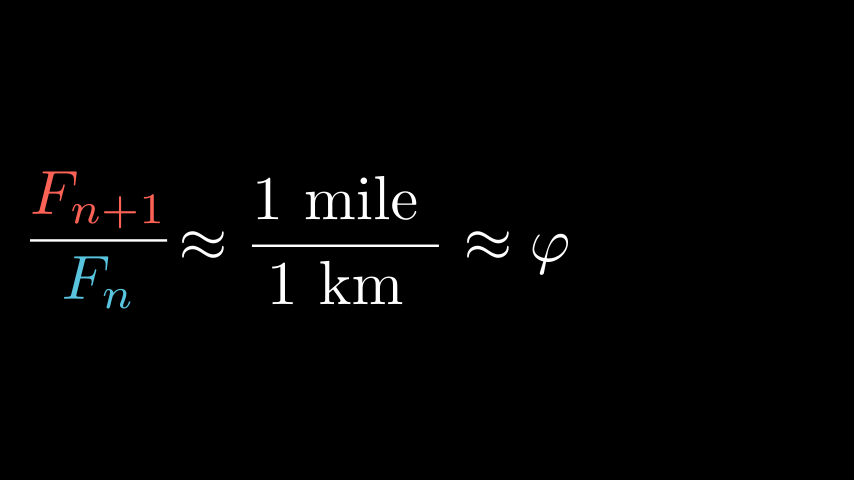